# 在未见月份情况下，对比使用CL和不使用CL的性能

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

# 加载数据
with open('results/future_test_results.json', 'r') as f:
    baseline_data = json.load(f)

with open('results/CL_unk_future_month.json', 'r') as f:
    cl_data = json.load(f)

months = baseline_data['month']
baseline_acc = baseline_data['acc']
cl_acc = cl_data['acc']
baseline_recall = baseline_data['recall']
cl_recall = cl_data['recall']
baseline_f1 = baseline_data['f1']
cl_f1 = cl_data['f1']

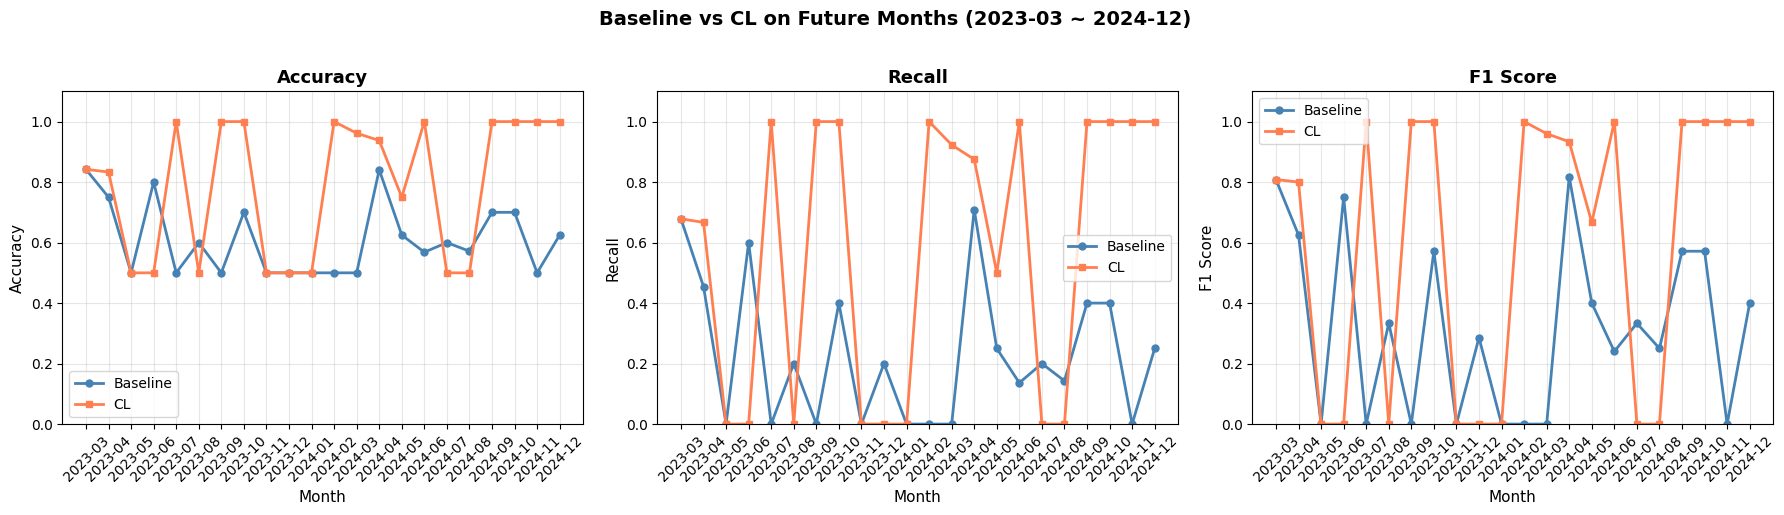

In [2]:
# 绘制3个子图：Accuracy、Recall、F1
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 子图1: Accuracy
axes[0].plot(months, baseline_acc, 'o-', label='Baseline', color='steelblue', linewidth=2, markersize=5)
axes[0].plot(months, cl_acc, 's-', label='CL', color='coral', linewidth=2, markersize=5)
axes[0].set_xlabel('Month', fontsize=11)
axes[0].set_ylabel('Accuracy', fontsize=11)
axes[0].set_title('Accuracy', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].set_ylim(0, 1.1)
axes[0].grid(alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# 子图2: Recall
axes[1].plot(months, baseline_recall, 'o-', label='Baseline', color='steelblue', linewidth=2, markersize=5)
axes[1].plot(months, cl_recall, 's-', label='CL', color='coral', linewidth=2, markersize=5)
axes[1].set_xlabel('Month', fontsize=11)
axes[1].set_ylabel('Recall', fontsize=11)
axes[1].set_title('Recall', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].set_ylim(0, 1.1)
axes[1].grid(alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

# 子图3: F1
axes[2].plot(months, baseline_f1, 'o-', label='Baseline', color='steelblue', linewidth=2, markersize=5)
axes[2].plot(months, cl_f1, 's-', label='CL', color='coral', linewidth=2, markersize=5)
axes[2].set_xlabel('Month', fontsize=11)
axes[2].set_ylabel('F1 Score', fontsize=11)
axes[2].set_title('F1 Score', fontsize=13, fontweight='bold')
axes[2].legend()
axes[2].set_ylim(0, 1.1)
axes[2].grid(alpha=0.3)
axes[2].tick_params(axis='x', rotation=45)

plt.suptitle('Baseline vs CL on Future Months (2023-03 ~ 2024-12)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [3]:
# 统计对比
baseline_f1_arr = np.array(baseline_f1)
cl_f1_arr = np.array(cl_f1)

print("="*50)
print("统计对比")
print("="*50)
print(f"Baseline - Mean Acc: {np.mean(baseline_acc):.4f}, Mean Recall: {np.mean(baseline_recall):.4f}, Mean F1: {np.mean(baseline_f1_arr):.4f}")
print(f"CL       - Mean Acc: {np.mean(cl_acc):.4f}, Mean Recall: {np.mean(cl_recall):.4f}, Mean F1: {np.mean(cl_f1_arr):.4f}")
print()
improved = np.sum(cl_f1_arr > baseline_f1_arr)
degraded = np.sum(cl_f1_arr < baseline_f1_arr)
same = np.sum(cl_f1_arr == baseline_f1_arr)
print(f"CL提升的月份数: {improved}, 下降: {degraded}, 相同: {same}")

统计对比
Baseline - Mean Acc: 0.6101, Mean Recall: 0.2282, Mean F1: 0.3163
CL       - Mean Acc: 0.7875, Mean Recall: 0.5747, Mean F1: 0.5986

CL提升的月份数: 13, 下降: 5, 相同: 4
